### Brazilian funds allocation

### Exploring the FI funds

In [1]:
# Input
date = '2018_09_21'
homePath = 'C:/Users/Mamed/Python4DS/'
projPath = homePath + 'FundsBR/'
strucPath = projPath + 'Structures_' + date + '/'
libsPath = projPath + 'Libs/'

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Load my libraries
exec(open(libsPath + 'fundsLib.py').read())

#### Blk 1 - Public bonds

In [187]:
# Read BLC
dfBLC1 = pd.read_pickle(strucPath + 'BLC_blk_1_.pkl')
dfBLC1.shape

(3752934, 21)

In [188]:
# Normalizing NaN values in the data, that have a lot of garbage
dfBLC1 = dfBLC1.fillna('NA')

In [190]:
# Convert date columns from string to timestamp
dfBLC1['DT_COMPTC'] = dfBLC1['DT_COMPTC'].apply(lambda x: correctDates(x))
dfBLC1['DT_EMISSAO'] = dfBLC1['DT_EMISSAO'].apply(lambda x: correctDates(x))
dfBLC1['DT_VENC'] = dfBLC1['DT_VENC'].apply(lambda x: correctDates(x))

In [253]:
# Read holiday calendar
holCalendar = pd.read_pickle(projPath + 'holCalendar.pkl')
holCalendar = holCalendar.apply(lambda x: pd.to_datetime(str(x)).strftime('%Y-%m-%d'))

In [462]:
dfBLC1.apply(lambda x: x.nunique())

TP_FUNDO                   15
CNPJ_FUNDO              16258
DENOM_SOCIAL            16285
DT_COMPTC                 164
TP_APLIC                    2
TP_ATIVO                    3
EMISSOR_LIGADO              3
TP_NEGOC                    2
QT_VENDA_NEGOC          43752
VL_VENDA_NEGOC         494969
QT_AQUIS_NEGOC          50018
VL_AQUIS_NEGOC         619381
QT_POS_FINAL           157418
VL_MERC_POS_FINAL     3189111
VL_CUSTO_POS_FINAL     303814
DT_CONFID_APLIC           723
TP_TITPUB                  14
CD_ISIN                   930
CD_SELIC                  131
DT_EMISSAO                198
DT_VENC                   490
dtype: int64

In [71]:
dfBLC1.iloc[3752854]

TP_FUNDO                                                       FMP-FGTS
CNPJ_FUNDO                                           03.915.903/0001-90
DENOM_SOCIAL          CAIXA FMP FGTS PETROBRAS III - CAIXA FMP FGTS ...
DT_COMPTC                                           2018-08-31 00:00:00
TP_APLIC                                               Títulos Públicos
TP_ATIVO                                         Título público federal
EMISSOR_LIGADO                                                       NA
TP_NEGOC                                                Para negociação
QT_VENDA_NEGOC                                                      680
VL_VENDA_NEGOC                                              6.57179e+06
QT_AQUIS_NEGOC                                                      357
VL_AQUIS_NEGOC                                              3.44971e+06
QT_POS_FINAL                                                          0
VL_MERC_POS_FINAL                                               

In [39]:
field = 'TP_APLIC'
aux = list(map(list, zip(*list(Counter(dfBLC1[field]).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

['Títulos Públicos', 'Operações Compromissadas']
[0.86, 0.14]


In [40]:
field = 'TP_ATIVO'
aux = list(map(list, zip(*list(Counter(dfBLC1[field]).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

['Título Público', 'Título público federal', 'NA']
[0.15, 0.85, 0.01]


In [41]:
field = 'EMISSOR_LIGADO'
aux = list(map(list, zip(*list(Counter(dfBLC1[field]).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

['NA', 'N', 'S']
[0.87, 0.11, 0.02]


In [42]:
field = 'TP_NEGOC'
aux = list(map(list, zip(*list(Counter(dfBLC1[field]).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

['Para negociação', 'Mantido até o vencimento']
[0.96, 0.04]


In [43]:
field = 'TP_TITPUB'
aux = list(map(list, zip(*list(Counter(dfBLC1[field]).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

['LETRAS FINANCEIRAS DO TESOURO', 'NOTAS DO TESOURO NACIONAL SERIE C', 'NOTAS DO TESOURO NACIONAL SERIE B', 'LETRAS DO TESOURO NACIONAL', 'NOTAS DO BANCO CENTRAL DO BRASIL SERIE E', 'NOTAS DO TESOURO NACIONAL - SERIE F', 'NOTAS DO TESOURO NACIONAL SERIE D', 'LETRAS FINANCEIRAS DO TESOURO SERIE A', 'LETRAS FINANCEIRAS DO TESOURO SERIE B', 'NOTAS DO TESOURO NACIONAL SERIE A3', 'NOTAS DO TESOURO NACIONAL SERIE A6', 'NOTAS DO TESOURO NACIONAL SERIE I', 'NOTAS DO TESOURO NACIONAL SERIE A1', 'NA']
[0.48, 0.02, 0.27, 0.17, 0.0, 0.04, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.01]


In [428]:
field = 'CD_ISIN'
aux = list(map(list, zip(*list(Counter(dfBLC1[field]).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

['BRSTNCLF16W0', 'BRSTNCNTC0K4', 'BRSTNCNTC0O6', 'BRSTNCLF16N9', 'BRSTNCLF1808', 'BRSTNCLF1865', 'BRSTNCNTC0Q1', 'BRSTNCLF18C8', 'BRSTNCNTB0A6', 'BRSTNCLF16C2', 'BRSTNCLTN5S5', 'BRSTNCLTN5V9', 'BRSTNCLTN5Q9', 'BRSTNCLF17X6', 'BRSTNCLFTG23', 'BRSTNCLF16D0', 'BRSTNCLF1691', 'BRSTNCLF16T6', 'BRSTNCLF16R0', 'BRSTNCLF1766', 'BRSTNCLF16S8', 'BRSTNCLF1Q59', 'BRSTNCLF1832', 'BRSTNCLF16X8', 'BRSTNCLF17I7', 'BRSTNCLTN5W7', 'BRSTNCLFTFS9', 'BRSTNCLF16A6', 'BRSTNCLF1899', 'BRSTNCLF18I5', 'BRSTNCLF16V2', 'BRSTNCLF1857', 'BRSTNCLF16E8', 'BRSTNCLF16U4', 'BRSTNCLF16B4', 'BRSTNCLTN5X5', 'BRSTNCLTN5Y3', 'BRSTNCLTN5T3', 'BRBCBRNBC501', 'BRSTNCLF17R8', 'BRSTNCLF16Q2', 'BRSTNCLF16P4', 'BRSTNCLF16O7', 'BRSTNCLF17S6', 'BRSTNCLF18F1', 'BRSTNCLFTG64', 'BRSTNCNTF063', 'BRSTNCLTN5O4', 'BRSTNCLTN5Z0', 'BRSTNCLTN616', 'BRSTNCLTN608', 'BRSTNCLF1675', 'BRSTNCLF17Y4', 'BRSTNCLFTG72', 'BRSTNCLFTFU5', 'BRSTNCNTC0M0', 'BRSTNCNTC0J6', 'BRSTNCLFTG80', 'BRSTNCLF17Z1', 'BRSTNCNTC0L2', 'BRSTNCNTC0P3', 'BRSTNCLFTGA5', 'BRSTNC

In [45]:
field = 'CD_SELIC'
aux = list(map(list, zip(*list(Counter(dfBLC1[field]).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

[210100.0, 770100.0, 760199.0, 100000.0, 213052.0, 500100.0, 212744.0, 180199.0, 213171.0, 950199.0, 213199.0, 212807.0, 213234.0, 213290.0, 772555.0, 780199.0, 780198.0, 235479.0, 771826.0, 213262.0, 213115.0, 180198.0, 212716.0, 240200.0, 240600.0, 242648.0, 240400.0, 213017.0, 760198.0, 760197.0, 242931.0, 240700.0, 241826.0, 241856.0, 241887.0, 241917.0, 241948.0, 241979.0, 242009.0, 242040.0, 242070.0, 242101.0, 242132.0, 242160.0, 242191.0, 242221.0, 242252.0, 242282.0, 242313.0, 242344.0, 242374.0, 242405.0, 242435.0, 242466.0, 242497.0, 242525.0, 242556.0, 242586.0, 242617.0, 242647.0, 242678.0, 242709.0, 242739.0, 242770.0, 242800.0, 242831.0, 242862.0, 242891.0, 242922.0, 240100.0, 240300.0, 242406.0, 242527.0, 242557.0, 242588.0, 242619.0, 242649.0, 242708.0, 242526.0, 212926.0, 212870.0, 212961.0, 212772.0, 212835.0, 212562.0, 212898.0, 212625.0, 212597.0, 213080.0, 212989.0, 213143.0, 780104.0, 212499.0, 242839.0, 180101.0, 180102.0, 180103.0, 180104.0, 235478.0, 212653.0,

In [467]:
# For each type of investment
apType = ['Títulos Públicos']

# For each ISIN code
isinCd = list(map(list, zip(*list(Counter(dfBLC1['CD_ISIN']).items()))))[0]

# For each competency date
dtComp = list(map(list, zip(*list(Counter(dfBLC1['DT_COMPTC']).items()))))[0]

In [479]:
assetsDict

{'BRSTNCLF16W0': {'CD_SELIC': 210100.0,
  'DT_COMPTC': [Timestamp('2005-02-28 00:00:00'),
   Timestamp('2005-01-31 00:00:00'),
   Timestamp('2005-10-31 00:00:00')],
  'DT_EMISSAO': datetime.datetime(2001, 8, 8, 0, 0),
  'DT_VENC': datetime.datetime(2006, 11, 15, 0, 0),
  'PU': [2212.3592224152908, 2184.1418223329183, 2499.3362437987244],
  'TP_APLIC': 'Títulos Públicos',
  'TP_ATIVO': 'Título Público',
  'TP_TITPUB': 'LETRAS FINANCEIRAS DO TESOURO',
  'bDays': [431.0, 449.0, 261.0]},
 'BRSTNCNTC0K4': {'CD_SELIC': 770100.0,
  'DT_COMPTC': [Timestamp('2005-02-28 00:00:00'),
   Timestamp('2005-01-31 00:00:00'),
   Timestamp('2005-10-31 00:00:00')],
  'DT_EMISSAO': datetime.datetime(2001, 1, 1, 0, 0),
  'DT_VENC': datetime.datetime(2031, 1, 1, 0, 0),
  'PU': [2529.8460560344829, 2512.1251626328244, 2513.0347323943661],
  'TP_APLIC': 'Títulos Públicos',
  'TP_ATIVO': 'Título Público',
  'TP_TITPUB': 'NOTAS DO TESOURO NACIONAL SERIE C',
  'bDays': [6490.0, 6508.0, 6320.0]},
 'BRSTNCNTC0O6': 

In [478]:
# Build assets dict
assetsDict = {}

for apType_ in apType:
    
    for isinCd_ in isinCd[:3]:
        
        assetsDict.update({isinCd_: {}})
        assetsDict[isinCd_].update({
            'TP_APLIC': apType_, 
            'DT_COMPTC': [], 
            'TP_ATIVO': 0, 
            'TP_TITPUB': 0, 
            'CD_SELIC': 0, 
            'DT_EMISSAO': 0, 
            'DT_VENC': 0, 
            'PU': [], 
            'bDays': []})
                
        for dtComp_ in dtComp[:3]:

            df_ = dfBLC1[(dfBLC1['TP_APLIC'] == apType_) & 
                         (dfBLC1['CD_ISIN'] == isinCd_) & 
                         (dfBLC1['DT_COMPTC'] == dtComp_)]

            print(apType_, isinCd_, dtComp_, 'Rows:', df_.shape[0])
            
            if df_.shape[0] > 0:
                
                # Compute PU
                df_['PU'] = df_.apply(lambda row: computePU(row), axis = 1)
                
                # Compute business days
                df_['bDays'] = df_.apply(lambda row: computeBdays(row, holCalendar), axis = 1)
                
                # Compute other features
                TP_ATIVO = maxFrequency(df_, 'TP_ATIVO')
                TP_TITPUB = maxFrequency(df_, 'TP_TITPUB')
                CD_SELIC = maxFrequency(df_, 'CD_SELIC')
                DT_EMISSAO = maxFrequency(df_, 'DT_EMISSAO')
                DT_VENC = maxFrequency(df_, 'DT_VENC')
                PU = np.median(df_['PU'][~np.isnan(df_['PU'])])
                bDays = np.median(df_['bDays'][~np.isnan(df_['bDays'])])
                
                assetsDict[isinCd_]['TP_APLIC'] = apType_
                assetsDict[isinCd_]['DT_COMPTC'] += [dtComp_]
                assetsDict[isinCd_]['TP_ATIVO'] = TP_ATIVO
                assetsDict[isinCd_]['TP_TITPUB'] = TP_TITPUB
                assetsDict[isinCd_]['CD_SELIC'] = CD_SELIC
                assetsDict[isinCd_]['DT_EMISSAO'] = DT_EMISSAO
                assetsDict[isinCd_]['DT_VENC'] = DT_VENC
                assetsDict[isinCd_]['PU'] += [PU]
                assetsDict[isinCd_]['bDays'] += [bDays]
                

Títulos Públicos BRSTNCLF16W0 2005-02-28 00:00:00 Rows: 718


C:\Users\Mamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Mamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Títulos Públicos BRSTNCLF16W0 2005-01-31 00:00:00 Rows: 652
Títulos Públicos BRSTNCLF16W0 2005-10-31 00:00:00 Rows: 867
Títulos Públicos BRSTNCNTC0K4 2005-02-28 00:00:00 Rows: 150
Títulos Públicos BRSTNCNTC0K4 2005-01-31 00:00:00 Rows: 141
Títulos Públicos BRSTNCNTC0K4 2005-10-31 00:00:00 Rows: 173
Títulos Públicos BRSTNCNTC0O6 2005-02-28 00:00:00 Rows: 325
Títulos Públicos BRSTNCNTC0O6 2005-01-31 00:00:00 Rows: 346
Títulos Públicos BRSTNCNTC0O6 2005-10-31 00:00:00 Rows: 286


In [458]:
# Compute PU
df_['PU'] = df_.apply(lambda row: computePU(row), axis = 1)

C:\Users\Mamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [459]:
# Compute business days
df_['bDays'] = df_.apply(lambda row: computeBdays(row, holCalendar), axis = 1)

C:\Users\Mamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [460]:
TP_APLIC = apType[i]
CD_ISIN = isinCd[j]
DT_COMPTC = dtComp[k]
TP_ATIVO = maxFrequency(df_, 'TP_ATIVO')
TP_TITPUB = maxFrequency(df_, 'TP_TITPUB')
CD_SELIC = maxFrequency(df_, 'CD_SELIC')
DT_EMISSAO = maxFrequency(df_, 'DT_EMISSAO')
DT_VENC = maxFrequency(df_, 'DT_VENC')
PU = np.median(df_['PU'][~np.isnan(df_['PU'])])
bDays = np.median(df_['bDays'][~np.isnan(df_['bDays'])])

In [461]:
PU

5074.466870669723

In [391]:
df_.apply(lambda x: x.nunique())

TP_FUNDO                2
CNPJ_FUNDO            480
DENOM_SOCIAL          480
DT_COMPTC               1
TP_APLIC                1
TP_ATIVO                1
EMISSOR_LIGADO          1
TP_NEGOC                2
QT_VENDA_NEGOC         69
VL_VENDA_NEGOC         74
QT_AQUIS_NEGOC         47
VL_AQUIS_NEGOC         49
QT_POS_FINAL          376
VL_MERC_POS_FINAL     404
VL_CUSTO_POS_FINAL      1
DT_CONFID_APLIC         3
TP_TITPUB               1
CD_ISIN                 1
CD_SELIC                1
DT_EMISSAO              1
DT_VENC                 1
PU                    326
bDays                   1
dtype: int64

In [445]:
df_.sample(5)

ValueError: a must be greater than 0

In [404]:
field = 'TP_TITPUB'
aux = list(map(list, zip(*list(Counter(df_[field]).items()))))
d0 = aux[0]
d1 = [round(x / sum(aux[1]), 2) for x in aux[1]]
dOut = d0[d1.index(max(d1))]

print(d0)
print(d1)
print(dOut)

['LETRAS DO TESOURO NACIONAL']
[1.0]
LETRAS DO TESOURO NACIONAL


In [405]:
field = 'TP_ATIVO'
aux = list(map(list, zip(*list(Counter(df_[field]).items()))))
d0 = aux[0]
d1 = [round(x / sum(aux[1]), 2) for x in aux[1]]
dOut = d0[d1.index(max(d1))]

print(d0)
print(d1)
print(dOut)

['Título público federal']
[1.0]
Título público federal


In [394]:
field = 'DT_EMISSAO'
aux = list(map(list, zip(*list(Counter(df_[field]).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

[datetime.datetime(2012, 1, 6, 0, 0)]
[1.0]


In [395]:
field = 'DT_VENC'
aux = list(map(list, zip(*list(Counter(df_[field]).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

[datetime.datetime(2016, 1, 1, 0, 0)]
[1.0]


In [386]:
np.median(df_['bDays'][~np.isnan(df_['bDays'])])

211.0

In [397]:
d0 = ['a', 'b', 'c']
d1 = [2, 3, 1]

In [400]:
d0[d1.index(max(d1))]

'b'

In [373]:
df_.shape

(481, 23)

In [375]:
df_.describe()

,VL_MERC_POS_FINAL,PU,bDays
count,4.810000e+02,474.000000,481.0
mean,5.651628e+07,902.040240,211.0
std,2.219010e+08,1.933597,0.0
min,0.000000e+00,901.307678,211.0
25%,1.659466e+06,901.883620,211.0
50%,8.116953e+06,901.883621,211.0
75%,3.246781e+07,901.883621,211.0
max,3.246781e+09,929.675915,211.0


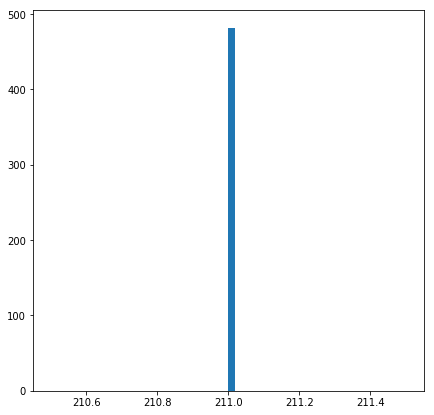

In [385]:
fig = plt.figure(figsize = (7,7))
plt.hist(df_['bDays'][~np.isnan(df_['bDays'])], bins = 50)
plt.show()

In [386]:
np.median(df_['bDays'][~np.isnan(df_['bDays'])])

211.0

In [335]:
field = 'VL_MERC_POS_FINAL'
aux = list(map(list, zip(*list(Counter(df_[field].apply(lambda x: type(x))).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

[<class 'float'>]
[1.0]


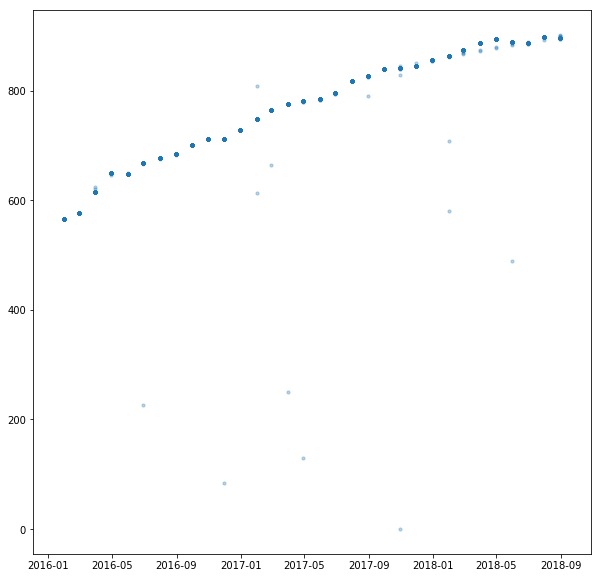

In [131]:
fig = plt.figure(figsize = (10, 10))
gs = gridspec.GridSpec(ncols = 1, nrows = 1, hspace = 0.05)

ax = fig.add_subplot(gs[0, 0])

plt.scatter(zzz['DT_COMPTC'].dt.to_pydatetime(), zzz['PU'], alpha = 0.3, s = 10)

plt.show()

In [194]:
pd.bdate_range('2011-01-05', '2011-01-09')

DatetimeIndex(['2011-01-05', '2011-01-06', '2011-01-07'], dtype='datetime64[ns]', freq='B')

In [195]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [202]:
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [203]:
print(pd.DatetimeIndex(start='2010-01-01',end='2010-01-15', freq=us_bd))

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15'],
              dtype='datetime64[ns]', freq='C')


In [212]:
np.busday_count('2018-09-24', '2018-10-01', holidays=['2018-09-26', '2018-09-27'])

3

#### Type of investment

In [139]:
# Group by date, adding and counting the PL in BI
df_sum = (dfBLC1.groupby(['TP_APLIC', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .sum() / 10**9).unstack(level = 0)

df_count = (dfBLC1.groupby(['TP_APLIC', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .count()).unstack(level = 0)

df_mean = (df_sum / df_count) * 10**3

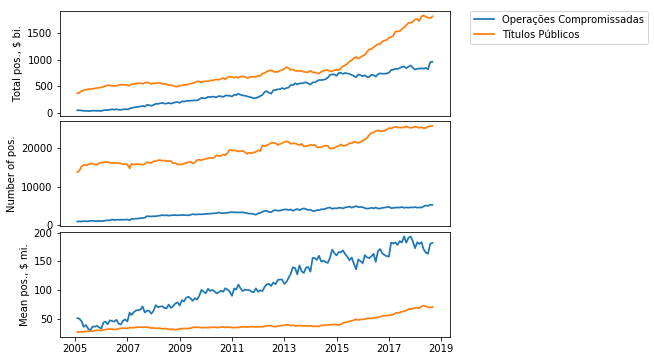

In [140]:
fig = plt.figure(figsize = (7, 6))
gs = gridspec.GridSpec(ncols = 1, nrows = 3, hspace = 0.05)

ax = fig.add_subplot(gs[0, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_sum[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Total pos., $ bi.')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = fig.add_subplot(gs[1, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_count[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Number of pos.')

ax = fig.add_subplot(gs[2, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_mean[i], linewidth = 1.75, label = i)
plt.ylabel('Mean pos., $ mi.')

plt.show()

#### Bond type for BR Bonds investments
#### Aplicações em 'Tít. Públicos', exclui 'Op. Compromissadas'

In [151]:
dfBonds = dfBLC1.copy(deep = True)
dfBonds = dfBonds[dfBonds['TP_APLIC'] == 'Títulos Públicos']
dfBonds = dfBonds.reset_index(drop = True)

In [152]:
# Group by date, adding and counting the PL in BI
dfBonds_sum = (dfBonds.groupby(['TP_TITPUB', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .sum() / 10**9).unstack(level = 0)

dfBonds_count = (dfBonds.groupby(['TP_TITPUB', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .count()).unstack(level = 0)

dfBonds_mean = (dfBonds_sum / dfBonds_count) * 10**3

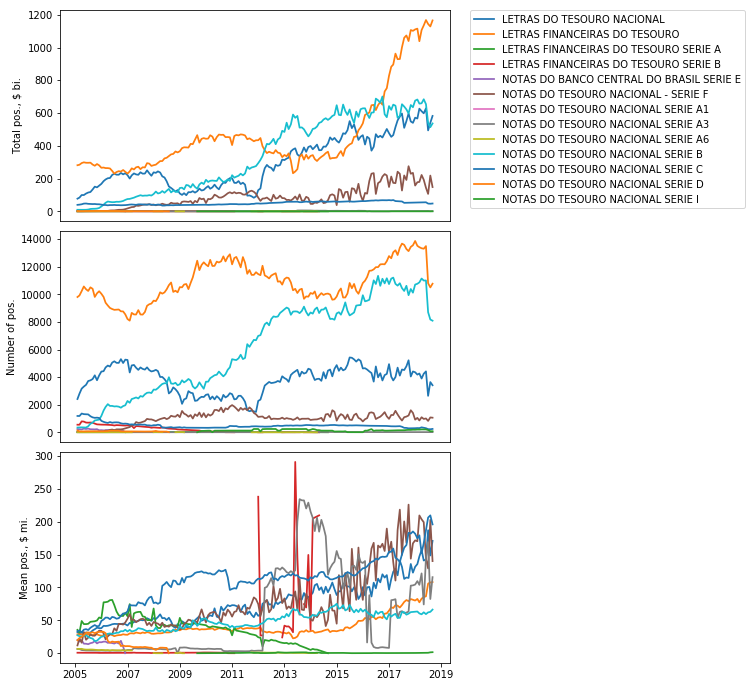

In [153]:
fig = plt.figure(figsize = (7, 12))
gs = gridspec.GridSpec(ncols = 1, nrows = 3, hspace = 0.05)

ax = fig.add_subplot(gs[0, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_sum[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Total pos., $ bi.')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = fig.add_subplot(gs[1, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_count[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Number of pos.')

ax = fig.add_subplot(gs[2, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_mean[i], linewidth = 1.75, label = i)
plt.ylabel('Mean pos., $ mi.')

plt.show()

#### Bond type for BR Bonds investments
#### Aplicações em 'Tít. Públicos', exclui 'Op. Compromissadas'

In [156]:
dfBonds.head()

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_COMPTC,TP_APLIC,TP_ATIVO,EMISSOR_LIGADO,TP_NEGOC,QT_VENDA_NEGOC,VL_VENDA_NEGOC,...,VL_AQUIS_NEGOC,QT_POS_FINAL,VL_MERC_POS_FINAL,VL_CUSTO_POS_FINAL,DT_CONFID_APLIC,TP_TITPUB,CD_ISIN,CD_SELIC,DT_EMISSAO,DT_VENC
0,FACFIF,00.838.158/0001-35,BANIF PRIMUS FUNDO DE INVESTIMENTO MULTIMERCAD...,2005-02-28,Títulos Públicos,Título Público,NaN,Para negociação,0.0,0.0,...,0.0,250.0,552837.45,2211.35,2005-03-15,LETRAS FINANCEIRAS DO TESOURO,BRSTNCLF16W0,210100.0,2001-08-08,2006-11-15
1,FACFIF,01.353.626/0001-44,AAA ALLOCATION FUNDO DE INVESTIMENTO EM COTAS ...,2005-01-31,Títulos Públicos,Título Público,NaN,Para negociação,NaN,NaN,...,NaN,20.0,50325.06,52629.65,2005-05-01,NOTAS DO TESOURO NACIONAL SERIE C,BRSTNCNTC0K4,770100.0,2001-01-01,2031-01-01
2,FACFIF,01.353.626/0001-44,AAA ALLOCATION FUNDO DE INVESTIMENTO EM COTAS ...,2005-02-28,Títulos Públicos,Título Público,NaN,Para negociação,NaN,NaN,...,NaN,20.0,50612.35,52629.65,2005-05-29,NOTAS DO TESOURO NACIONAL SERIE C,BRSTNCNTC0K4,770100.0,2001-01-01,2031-01-01
3,FACFIF,01.842.560/0001-56,CSHG BELLA FUNDO DE INVESTIMENTO EM COTAS DE F...,2005-02-28,Títulos Públicos,Título Público,NaN,Para negociação,NaN,NaN,...,NaN,1339.0,2272324.93,2278326.60,2005-05-29,NOTAS DO TESOURO NACIONAL SERIE C,BRSTNCNTC0O6,770100.0,2002-04-01,2008-04-01
4,FACFIF,03.432.201/0001-56,AMBAR - FUNDO DE INVESTIMENTO MULTIMERCADO CRÉ...,2005-01-31,Títulos Públicos,Título Público,NaN,Para negociação,0.0,0.0,...,0.0,106.0,232266.08,232266.08,2005-05-01,LETRAS FINANCEIRAS DO TESOURO,BRSTNCLF16N9,210100.0,2001-06-28,2005-03-16


In [158]:
field = 'TP_TITPUB'
aux = list(map(list, zip(*list(Counter(dfBonds[field]).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

['LETRAS FINANCEIRAS DO TESOURO', 'NOTAS DO TESOURO NACIONAL SERIE C', 'NOTAS DO TESOURO NACIONAL SERIE B', 'LETRAS DO TESOURO NACIONAL', 'NOTAS DO TESOURO NACIONAL - SERIE F', 'NOTAS DO BANCO CENTRAL DO BRASIL SERIE E', 'NOTAS DO TESOURO NACIONAL SERIE D', 'LETRAS FINANCEIRAS DO TESOURO SERIE B', 'LETRAS FINANCEIRAS DO TESOURO SERIE A', 'NOTAS DO TESOURO NACIONAL SERIE A3', 'NOTAS DO TESOURO NACIONAL SERIE A6', 'NOTAS DO TESOURO NACIONAL SERIE I', nan]
[0.52, 0.02, 0.27, 0.13, 0.04, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.01]


In [152]:
# Group by date, adding and counting the PL in BI
dfBonds_sum = (dfBonds.groupby(['TP_TITPUB', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .sum() / 10**9).unstack(level = 0)

dfBonds_count = (dfBonds.groupby(['TP_TITPUB', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .count()).unstack(level = 0)

dfBonds_mean = (dfBonds_sum / dfBonds_count) * 10**3

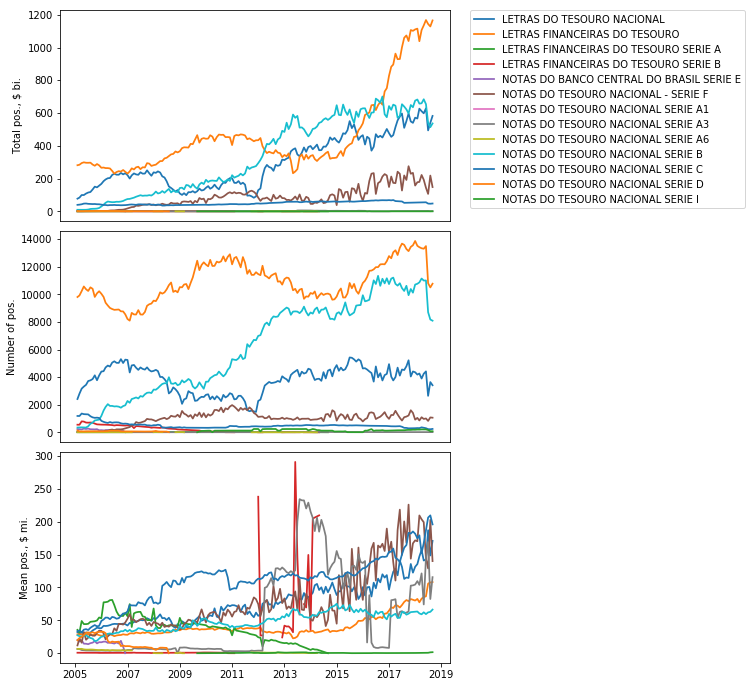

In [153]:
fig = plt.figure(figsize = (7, 12))
gs = gridspec.GridSpec(ncols = 1, nrows = 3, hspace = 0.05)

ax = fig.add_subplot(gs[0, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_sum[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Total pos., $ bi.')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = fig.add_subplot(gs[1, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_count[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Number of pos.')

ax = fig.add_subplot(gs[2, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_mean[i], linewidth = 1.75, label = i)
plt.ylabel('Mean pos., $ mi.')

plt.show()

#### Total PL

In [ ]:
# Total PL: group by date, sum and transfor units to trillions
dfSum = dfPL.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].sum() / 10**12

fig = plt.figure(figsize = (8, 3))
plt.plot(dfSum, 'k', linewidth = 0.75)
plt.show()

#### We can see three some errors in data, lets locate it and substitute by time neighbors interpolation

In [ ]:
# We have to run 'interpOut' three times
dfPL = interpOutlier(dfPL)

In [ ]:
dfPL = interpOutlier(dfPL)

In [ ]:
dfPL = interpOutlier(dfPL)

In [ ]:
# Total PL: group by date, sum and transfor units to trillions
dfSum = dfPL.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].sum() / 10**12

fig = plt.figure(figsize = (8, 3))
plt.plot(dfSum, 'k', linewidth = 0.75)
plt.show()

#### Cheking PL evolution by fund type

In [ ]:
# Fund types
field = 'TP_FUNDO'
aux = list(map(list, zip(*list(Counter(dfPL[field]).items()))))
fundTypes = aux[0]
print(fundTypes)

In [ ]:
# Group by fund type and date, adding the PL in trillions
dfTypeSum = dfPL.groupby(['TP_FUNDO', 'DT_COMPTC'])['VL_PATRIM_LIQ'].sum() \
    / 10**12
dfTypeSum = dfTypeSum.unstack(level = 0)
dfTypeSum.head()

In [ ]:
fig = plt.figure(figsize = (7, 4))
ax = fig.add_subplot(1,1,1)

# Plot each type
for ft in fundTypes:
    #if ft not in ['FI', 'FI-FGTS', 'FIF', 'FACFIF', 'FIP', 'FITVM', 'FMP-FGTS']:
    plt.plot(dfTypeSum.index, dfTypeSum[ft].values, linewidth = 1.75, label = ft)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### In percentage

In [ ]:
dfTypeSum['total'] = dfTypeSum[list(dfTypeSum)].sum(axis=1)
dfTypeSumPerc = dfTypeSum.div(dfTypeSum.total, axis='index')
dfTypeSumPerc.head()

In [ ]:
fig = plt.figure(figsize = (7, 4))
ax = fig.add_subplot(1,1,1)

# Plot each type
for ft in fundTypes:
    plt.plot(dfTypeSum.index, percent[ft].values, linewidth = 1.75, label = ft)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Only the FI type

In [ ]:
dfFI = dfPL[dfPL['TP_FUNDO'] == 'FI']
dfFI = dfFI.reset_index(drop = True)

In [ ]:
# Group by date, adding and counting the PL in trillions
dfFIsum = dfFI.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].sum() / 10**12
dfFIcount = dfFI.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].count()
dfFImeanPL = (dfFIsum / dfFIcount) * 10**6

In [ ]:
fig = plt.figure(figsize = (7, 6))
gs = gridspec.GridSpec(ncols = 1, nrows = 3, hspace = 0.05)

ax = fig.add_subplot(gs[0, 0])
plt.plot(dfFIsum.index, dfFIsum, linewidth = 1.75)
ax.get_xaxis().set_ticks([])
plt.ylabel('Total PL, trillions')

ax = fig.add_subplot(gs[1, 0])
plt.plot(dfFIcount.index, dfFIcount, linewidth = 1.75)
ax.get_xaxis().set_ticks([])
plt.ylabel('Number of funds')

ax = fig.add_subplot(gs[2, 0])
plt.plot(dfFImeanPL.index, dfFImeanPL, linewidth = 1.75)
plt.ylabel('Mean PL, millions')

plt.show()